# 합성곱 신경망 다중분류 (fashion-mnist)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2.데이터 정보

In [5]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
samples = np.random.randint(60000, size=25)
samples

array([12374,  7258, 51127, 40200, 10184,   698, 52063, 47358, 17143,
       51065, 46361, 23762, 50536, 45815, 48006, 20172, 17754, 28057,
       14003, 31194, 18434, 31294, 48688, 49197, 24098])

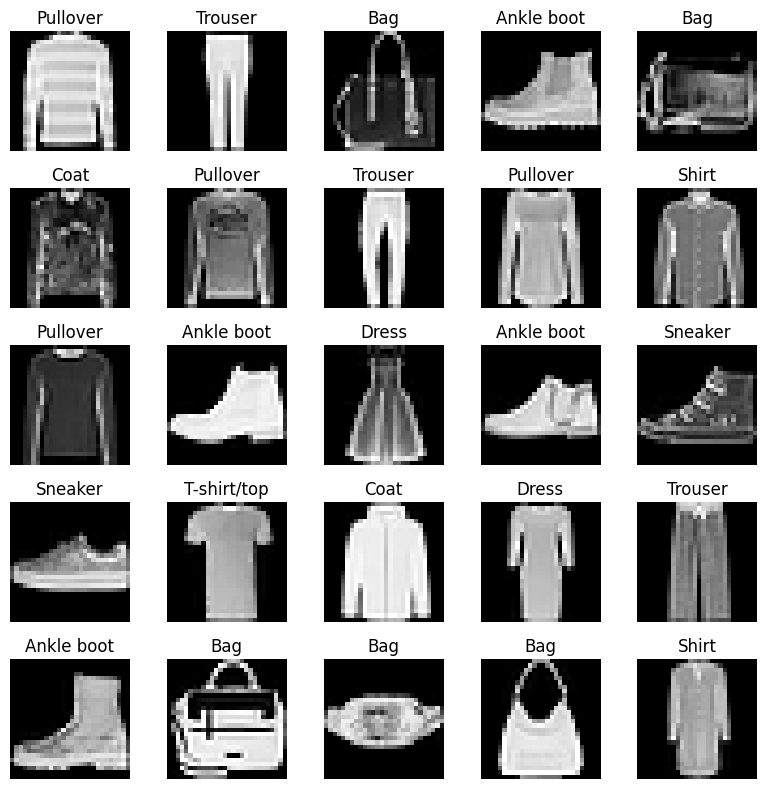

In [7]:
fig = plt.figure(figsize=(8, 8))

for i, idx in enumerate(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(classes[y_train[idx]])
plt.tight_layout()
plt.show()

## 3.데이터 분리

- 검증용 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 스케일
- Min-Max Scailing

In [11]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

### 원핫인코딩

In [12]:
from keras.utils import to_categorical

In [13]:
y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [14]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## 4.모델 만들기

In [15]:
from keras import layers

In [16]:
X_train_s.shape

(48000, 28, 28)

In [17]:
X_train_s = X_train_s.reshape(-1, 28, 28, 1)
X_train_s.shape

(48000, 28, 28, 1)

In [18]:
X_val_s = X_val_s.reshape(-1, 28, 28, 1)
X_val_s.shape

(12000, 28, 28, 1)

In [19]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,090 (125.35 KB)

 Trainable params: 32,090 (125.35 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [21]:
EPOCHS = 30
BATCHSIZE = 64

In [22]:
history = model.fit(
    X_train_s,
    y_train_o,
    epochs=EPOCHS,
    batch_size=BATCHSIZE,
    validation_data=(X_val_s, y_val_o)
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.6481 - loss: 0.9863 - val_acc: 0.8298 - val_loss: 0.4631
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8520 - loss: 0.4134 - val_acc: 0.8627 - val_loss: 0.3803
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8755 - loss: 0.3472 - val_acc: 0.8777 - val_loss: 0.3416
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8882 - loss: 0.3142 - val_acc: 0.8663 - val_loss: 0.3575
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8947 - loss: 0.2929 - val_acc: 0.8852 - val_loss: 0.3193
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8994 - loss: 0.2777 - val_acc: 0.8938 - val_loss: 0.2975
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9050 - loss: 0.2617 - val_acc: 0.8846 - val_loss: 0.3149
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9094 - loss: 0.2515 - val_acc: 0.8967 - val_loss: 0.2833
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

In [23]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

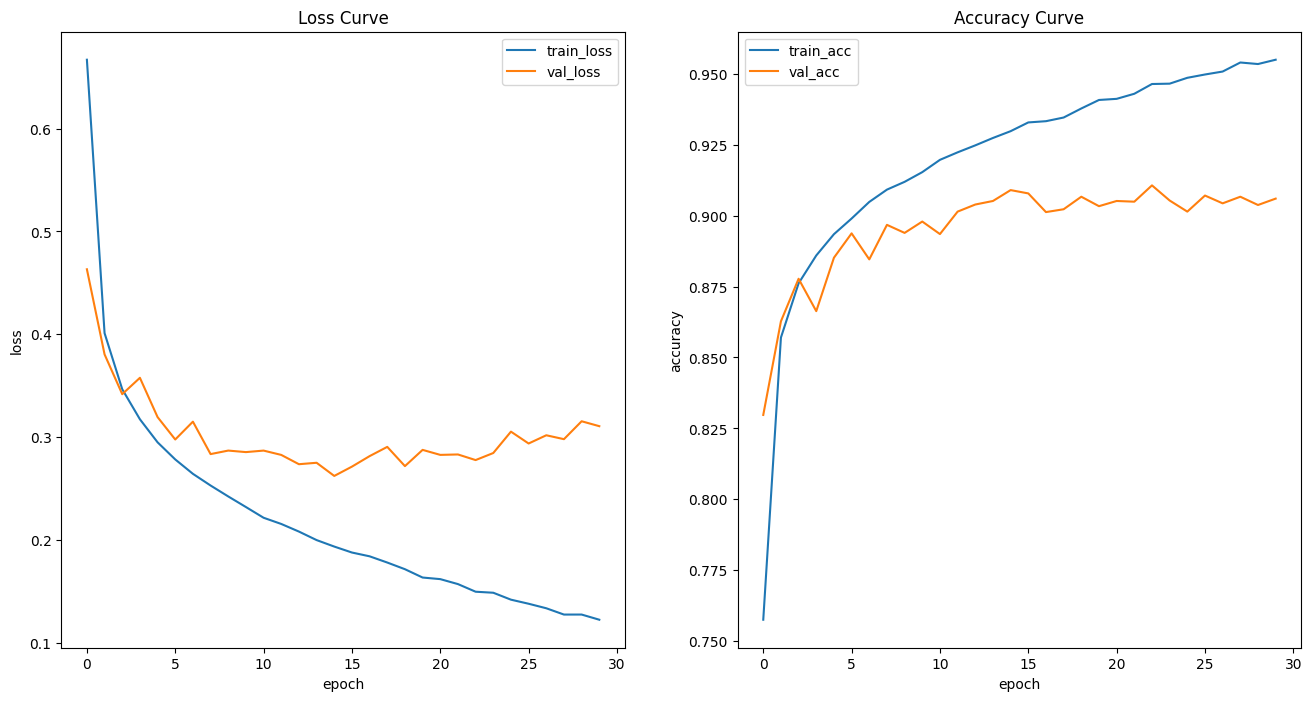

In [24]:
plot_history(history)

## 5.테스트

In [25]:
# 스케일링
X_test_s = X_test.astype('float')/255.

In [26]:
X_test_s = X_test_s.reshape(-1, 28, 28, 1)
X_test_s.shape

(10000, 28, 28, 1)

In [27]:
y_pred = model.predict(X_test_s)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.4688524e-09, 1.2724246e-14, 7.3163551e-09, ..., 4.0602276e-06,
        1.5053812e-09, 9.9998736e-01],
       [2.2248589e-06, 4.0966997e-13, 9.9999011e-01, ..., 4.6016199e-12,
        5.9738230e-12, 1.5159541e-09],
       [1.2983461e-08, 9.9999833e-01, 2.4893534e-09, ..., 1.5121870e-23,
        1.9257956e-10, 1.3354748e-13],
       ...,
       [3.2003546e-11, 4.1705702e-19, 1.9479199e-10, ..., 1.4855469e-14,
        1.0000000e+00, 1.0117674e-17],
       [1.7945418e-07, 9.9999928e-01, 3.0524871e-11, ..., 2.2046693e-20,
        1.2950318e-14, 4.2843971e-12],
       [4.2861779e-05, 1.3001682e-09, 1.4357008e-05, ..., 8.8608384e-01,
        2.5633827e-03, 2.2554839e-07]], dtype=float32)

In [28]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [29]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## 5.평가지표

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [31]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.8986
recall:  0.8986
precision:  0.8988
f1:  0.8984


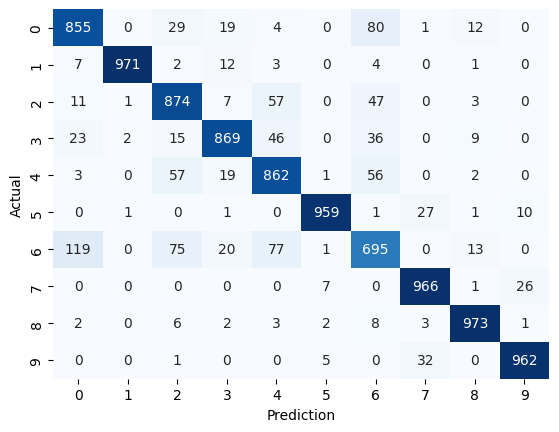

In [32]:
print_metrics(y_test, y_pred)